## KNN Vecinos más cercanos para clasificacion

Se utiliza comunmente para clasificar instancias y en casos se usa como regresor o para reemplazar datos faltantes 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

Enfoque para clasificar nuevas instacias

In [50]:
ruta = r'C:\Users\USUARIO\Documents\Python Scripts\ML\Scripts\DATA_TOOLS\Modelos Machine Learning\KNN Vecinos cercanos\creditos.csv'
ruta = ruta.replace(os.sep,'/')
data_clientes = pd.read_csv(ruta)
data_clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


#### Pagadores vs Deudores

In [51]:
buenos = data_clientes[data_clientes['cumplio']==1]
malos = data_clientes[data_clientes['cumplio']==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

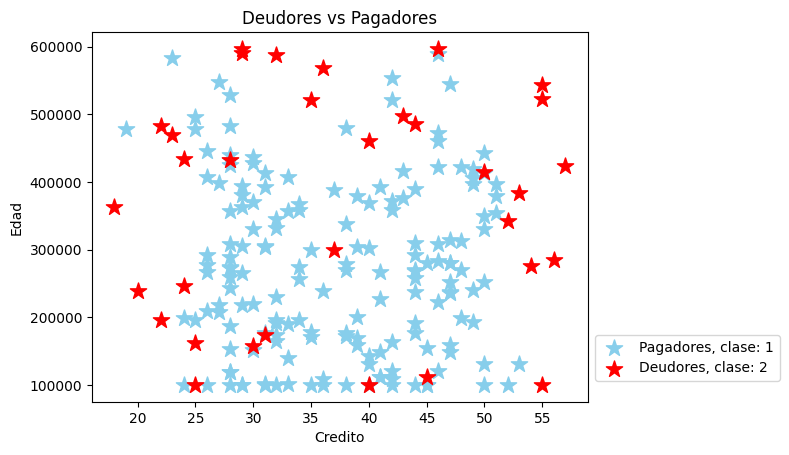

In [52]:
plt.scatter(buenos['edad'], buenos['credito'], marker='*', s=150, color= 'skyblue', label='Pagadores, clase: 1')
plt.scatter(malos['edad'], malos['credito'], marker='*', s=150, color= 'red', label='Deudores, clase: 2')
plt.ylabel('Edad')
plt.xlabel('Credito')
plt.title('Deudores vs Pagadores')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

### __Preparacion de los datos (escalar)__
Se deben escalar los datos 

In [53]:
datos = data_clientes[['edad', 'credito']]
clase = data_clientes['cumplio']

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

Primer datos corresponde al primer cliente 18 años considerada la edad más baja por lo cual es reemplazada por 0 y el credito tiene un valor intermedio    
Esto permite mantenerlos en la misma escala y no sesgar el modelo

### __Creacion del Modelo KNN__
#### __Valor de K__

In [54]:
clasificador = KNeighborsClassifier(n_neighbors=5)

clasificador.fit(datos, clase)

KNeighborsClassifier()

#### __Nuevo solicitante (Clasificacion)__

Clase [0], probabilidad clase solicitante: [[1. 0.]]


c:\Users\USUARIO\Documents\Python Scripts\ML\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


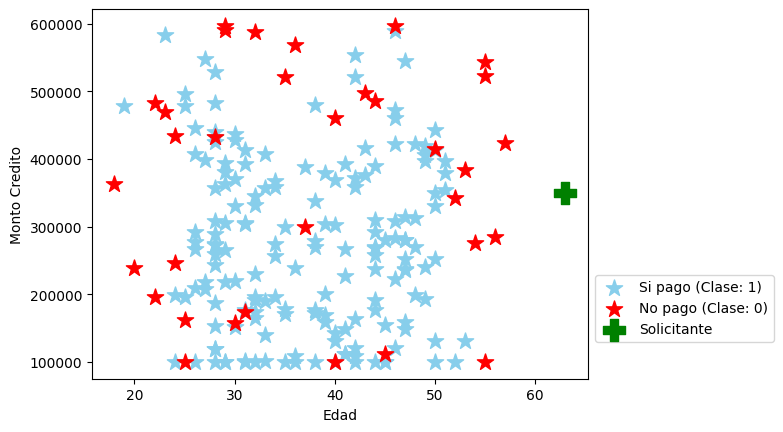

In [56]:
edad = 63
monto =350000

## Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

## Calcular clase y probablidades (Como usar el modelo)
clase = clasificador.predict(solicitante)
probabilidad_solicitante = clasificador.predict_proba(solicitante)
print(f'Clase {clase}, probabilidad clase solicitante: {probabilidad_solicitante}')


## Grafica 
plt.scatter(buenos['edad'], buenos['credito'], marker='*', s=150, color = 'skyblue', label = 'Si pago (Clase: 1)')
plt.scatter(malos['edad'], malos['credito'], marker='*', s=150, color = 'red', label = 'No pago (Clase: 0)')
plt.scatter(edad, monto, marker='P', s=250, color= 'green', label ='Solicitante')
plt.ylabel('Monto Credito')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1,0.3))
plt.show()